# bibliotecas

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import researchpy as rp

# dados

* FlightDelays.csv


In [2]:
flightdelays = pd.read_csv(filepath_or_buffer="rawdata\FlightDelays.csv")

flightdelays.head()

,ID,Carrier,FlightNo,Destination,DepartTime,Day,Month,FlightLength,Delay,Delayed30
0,1,UA,403,DEN,4-8am,Fri,May,281,-1,No
1,2,UA,405,DEN,8-Noon,Fri,May,277,102,Yes
2,3,UA,409,DEN,4-8pm,Fri,May,279,4,No
3,4,UA,511,ORD,8-Noon,Fri,May,158,-2,No
4,5,UA,667,ORD,4-8am,Fri,May,143,-3,No


## Crosstab

In [3]:
# Contagem de dados cruzados

carriers = pd.crosstab(flightdelays['Carrier'], flightdelays['Delayed30'])
carriers 

Delayed30,No,Yes
Carrier,,
AA,2513,393
UA,919,204


## Bar plot

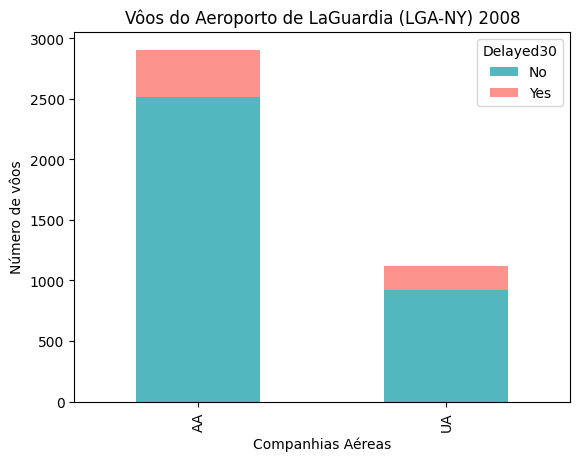

In [10]:
# Barplot

carriers.plot(kind="bar", stacked= True, color=["#0899a5","#f7665a"], alpha= 0.7) # ou colormap=
plt.title("Vôos do Aeroporto de LaGuardia (LGA-NY) 2008")
plt.ylabel("Número de vôos")
plt.xlabel("Companhias Aéreas")
plt.show()


## Crosstab (%)

In [5]:
# Cruzamento de dados (percentual)

def percent_contingency(data, col1, col2, type):
    cont_table = pd.crosstab(data[col1], data[col2], normalize= type) * 100
    return cont_table.map(lambda x: f'{x:.2f}%')

percent_contingency(flightdelays, 'Carrier','Delayed30',"index")

Delayed30,No,Yes
Carrier,,
AA,86.48%,13.52%
UA,81.83%,18.17%


## Histograma

In [6]:
# distribuição dos atrasos da united airlines (UA) por classe

ua_delays = flightdelays.loc[flightdelays['Carrier']=='UA','Delay']

bins = range(-50,400,50)

ua_delays_hist_data = pd.cut(x= ua_delays, bins= bins).value_counts()

ua_delays_hist_data

Delay
(-50, 0]      722
(0, 50]       249
(50, 100]      86
(100, 150]     39
(150, 200]     14
(200, 250]      7
(250, 300]      3
(300, 350]      2
Name: count, dtype: int64

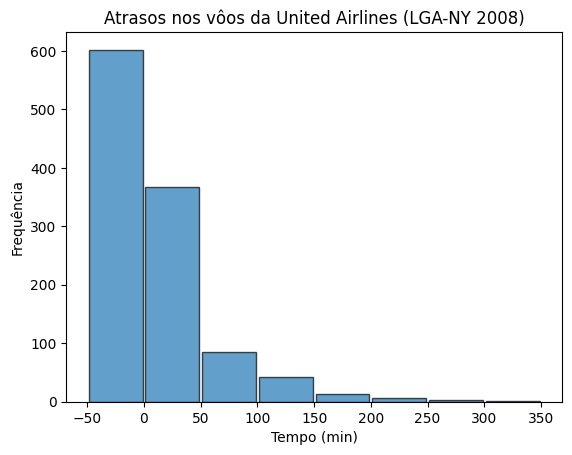

In [7]:
# Histograma
 
plt.hist(ua_delays, bins=bins, edgecolor = "black", rwidth=0.95, alpha = 0.7)
plt.title("Atrasos nos vôos da United Airlines (LGA-NY 2008)")
plt.ylabel("Frequência")
plt.xlabel("Tempo (min)")

plt.show()

### dot plot

# Numeric Summaries

## Média e mediana

In [32]:
ua_delays.agg(['mean','median'], axis='index')

mean      15.983081
median    -1.000000
Name: Delay, dtype: float64

## Trimmed mean

In [33]:
ex2_1 = [1,3,3,4,4,7,8,10,14,21,21,26]
stats.trim_mean(ex2_1,proportiontocut=0.25) # em scipy.stats

7.833333333333333

## Summary statistics


In [44]:
recidivism = pd.read_csv(filepath_or_buffer='rawdata\Recidivism.csv')
recidivism.head()

,Gender,Age,Age25,Race,Offense,Recid,Type,Days
0,M,Under 25,Under 25,White-NonHispanic,Felony,Yes,Tech,16.0
1,M,55 and Older,Over 25,White-NonHispanic,Felony,Yes,Tech,19.0
2,M,25-34,Over 25,White-NonHispanic,Felony,Yes,Tech,22.0
3,M,55 and Older,Over 25,White-NonHispanic,Felony,Yes,Tech,25.0
4,M,25-34,Over 25,Black-NonHispanic,Felony,Yes,Tech,26.0


In [46]:
rp.summarize(data= recidivism['Days'], stats= ["N", "Mean", "Median", "Variance", "SD", "SE", "CI", 'Min', 'Max', 'Range', "Kurtosis", "Skew"], decimals=2)

,Name,N,Mean,Median,Variance,SD,SE,95% Conf. Interval,Min,Max,Range,Kurtosis,Skew
0,Days,5386,473.33,418.0,80167.88,283.14,3.86,"[465.76, 480.89]",0.0,1095.0,1095.0,2.16,0.46


## Sumário descritivo das informações do Dataframe

In [48]:
rp.codebook(recidivism)

Variable: Gender    Data Type: object 

 Number of Obs.: 17022 
 Number of missing obs.: 3 
 Percent missing: 0.02 
 Number of unique values: 2 

 Data Values and Counts: 
 
 Values  Frequency
     F       2101
     M      14918




Variable: Age    Data Type: object 

 Number of Obs.: 17022 
 Number of missing obs.: 3 
 Percent missing: 0.02 
 Number of unique values: 5 

 Data Values and Counts: 
 
       Values  Frequency
       25-34       6227
       35-44       4035
       45-54       2872
55 and Older        808
    Under 25       3077




Variable: Age25    Data Type: object 

 Number of Obs.: 17022 
 Number of missing obs.: 3 
 Percent missing: 0.02 
 Number of unique values: 2 

 Data Values and Counts: 
 
   Values  Frequency
 Over 25      13942
Under 25       3077




Variable: Race    Data Type: object 

 Number of Obs.: 17022 
 Number of missing obs.: 34 
 Percent missing: 0.2 
 Number of unique values: 10 

 Data Values and Counts: 
 
                                    

## Boxplot

In [99]:
ua_flights = flightdelays.loc[flightdelays['Carrier']=='UA',:]
ua_flights.head()

,ID,Carrier,FlightNo,Destination,DepartTime,Day,Month,FlightLength,Delay,Delayed30
0,1,UA,403,DEN,4-8am,Fri,May,281,-1,No
1,2,UA,405,DEN,8-Noon,Fri,May,277,102,Yes
2,3,UA,409,DEN,4-8pm,Fri,May,279,4,No
3,4,UA,511,ORD,8-Noon,Fri,May,158,-2,No
4,5,UA,667,ORD,4-8am,Fri,May,143,-3,No


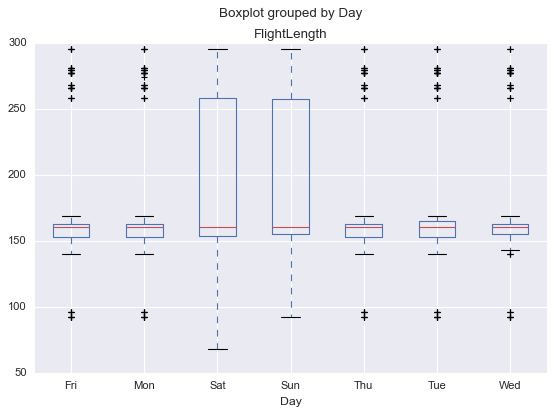

In [100]:
# consulte estilos em plt.style.available
plt.style.use('seaborn-v0_8')
ua_flights.boxplot(column='FlightLength', by= 'Day')
plt.show()

## Quantiles and Normal quantile plots

pag 39